In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style("whitegrid")

In [4]:
carddata = pd.read_csv("creditcard.csv")
carddata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# Exploratory Data Analysis 

carddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
# Exploratory Data Analysis

pd.set_option("display.float", "{:.2f}".format)
carddata.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [20]:
# Check for missing values in the dataset 

carddata.isnull().sum().sum()

0

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

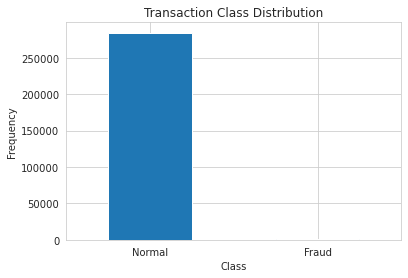

In [21]:
# Reading column labels for reference # Check and work with non-transformed variable 

LABELS = ["Normal", "Fraud"]

datacount_classes = pd.value_counts(carddata['Class'], sort = True)
datacount_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# Check and work with non-transformed variable 

LABELS = ["Normal", "Fraud"]

datacount_classes = pd.value_counts(carddata['Class'], sort = True)
datacount_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");carddata.columns

In [22]:
carddata.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [23]:
# Prerequisite for Imbalanced dataset 
# Labelling and determining number of fraud and valid transactions in the given dataset 
# Labelling FRAUD = 1 & NORMAL TRANSACTIONS = 0 

fraud = carddata[carddata['Class'] == 1]
normal = carddata[carddata['Class'] == 0]


In [24]:
print(f"Shape of Fraudulent transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulent transactions: {normal.shape}")

Shape of Fraudulent transactions: (492, 31)
Shape of Non-Fraudulent transactions: (284315, 31)


In [25]:
# Different transaction patterns and amount of money used in different classes 

pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


In [26]:
# Similary checking for Time frame 

pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


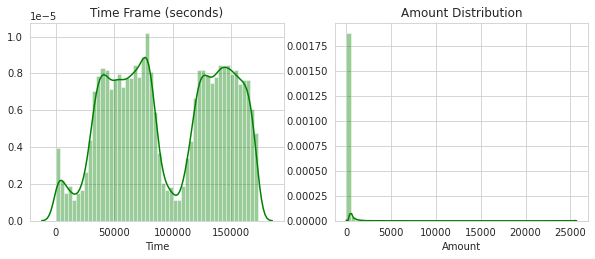

In [27]:
# Plot for Amount and Time frame

# Plot for Time frame
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('Time Frame (seconds)')

sns.distplot(carddata['Time'], color= 'green');

# Plot for Amount

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.distplot(carddata['Amount'], color= 'green');

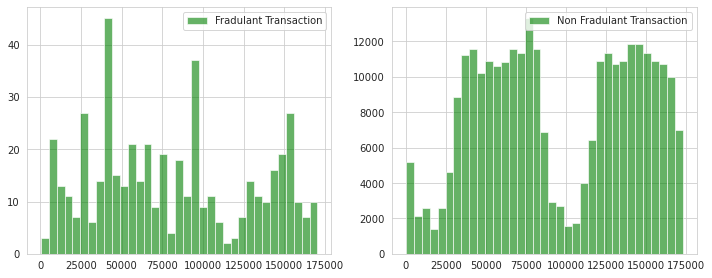

In [28]:
# Plotting histogram 

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
carddata[carddata.Class == 1].Time.hist(bins=35, color = 'green', alpha = 0.6, label = "Fradulant Transaction")
plt.legend()

plt.subplot(2,2,2)
carddata[carddata.Class == 0].Time.hist(bins=35, color = 'green', alpha = 0.6, label = "Non Fradulant Transaction")
plt.legend()


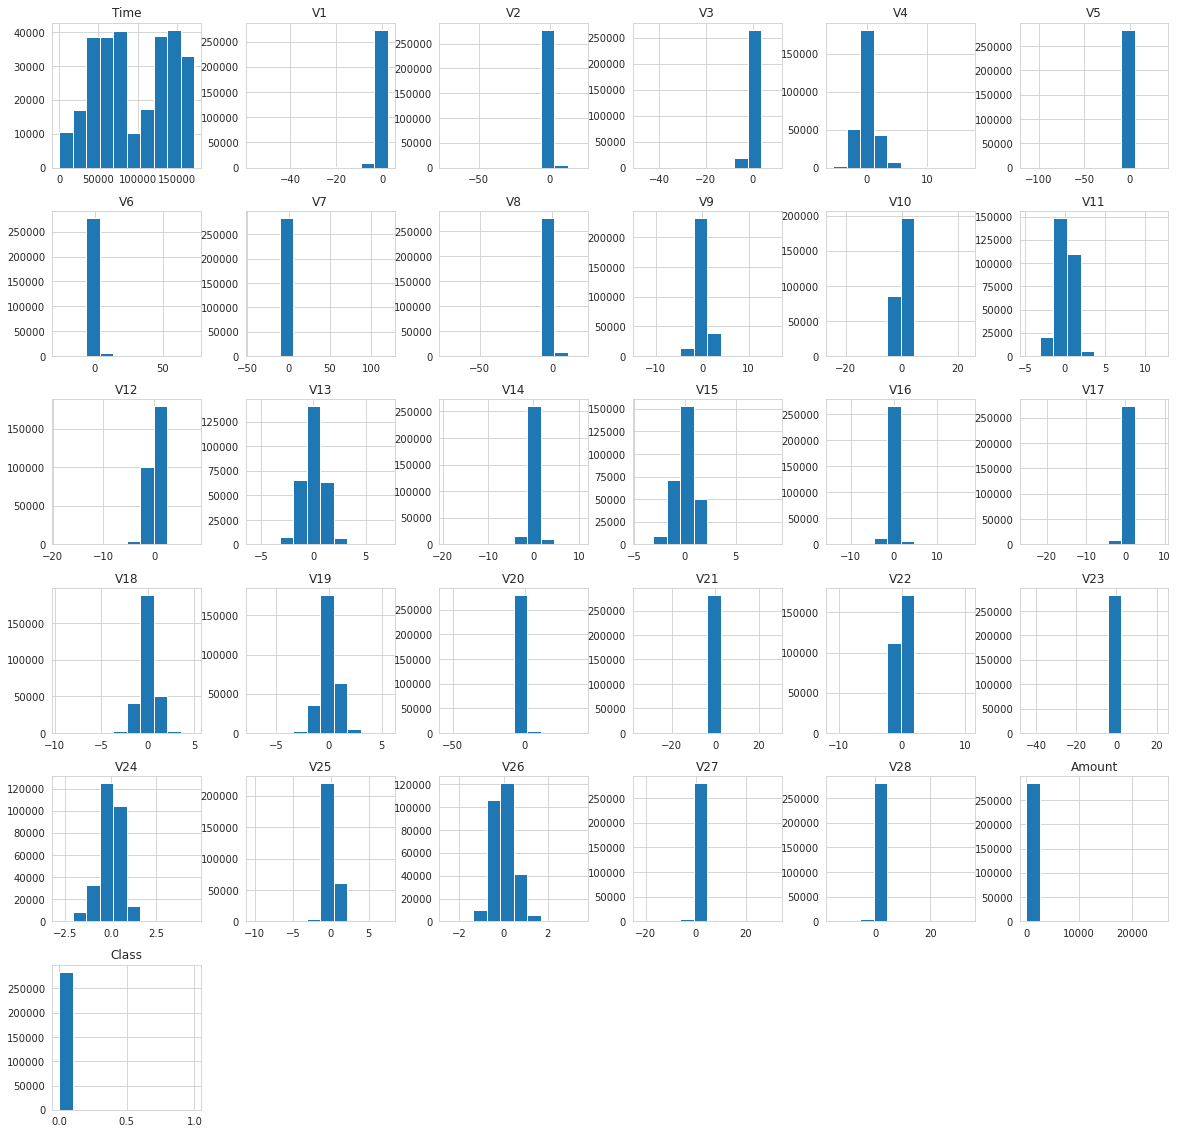

In [29]:
# Sample distribution plots for every parameter in the dataset

carddata.hist(figsize=(20,20));

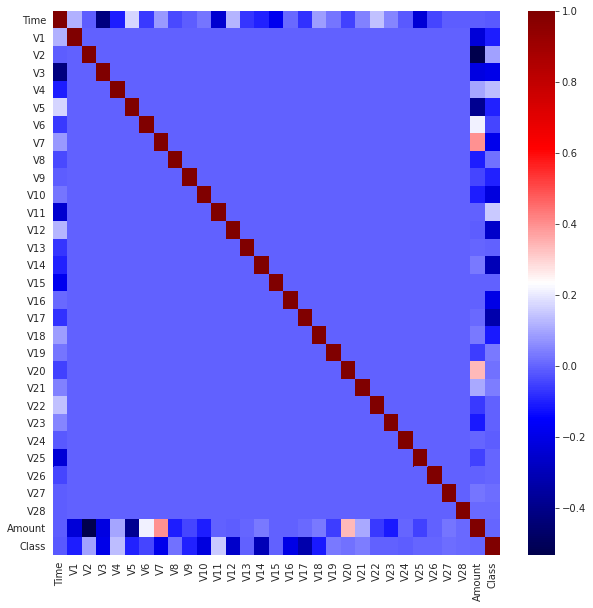

In [30]:
# Plotting Correlation Matrix to check if there are any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data= carddata.corr(), cmap= "seismic")
plt.show();


# We can interpret that high correlations comes from parameters: 
# 1) Amount & V2 (-0.53)
# 2) Time & V3 (-0.42)
# 3) Amount & V4 (0.4)

In [31]:
# Data pre-processing 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = carddata.drop('Class', axis=1)
y = carddata.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [32]:
# Print results 

print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [34]:
# IMPLEMENTING Convolution Neural Network 

X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)
X_validate_d = np.expand_dims(X_validate, -1)


In [35]:
# PRINT RESULTS 

print(f"TRAINING: X_train: {X_train_d.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate_d.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test_d.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30, 1), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30, 1), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30, 1), y_test: (85443,)


In [36]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [37]:
epochs = 10
batch = 16
weights = {0:w_n, 1:w_p}

model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 128)           512       
_________________________________________________________________
flatten (Flatten)            (None, 3456)              0

In [39]:
METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
r = model.fit(X_train_d, y_train, 
              validation_data=(X_validate_d, y_validate),
              batch_size=batch, 
              epochs=epochs, 
              class_weight=weights
             )

Epoch 1/10
9969/9969 [==============================] - 136s 14ms/step - loss: 0.0858 - accuracy: 0.9261 - precision: 0.0199 - recall: 0.8293 - val_loss: 65.6977 - val_accuracy: 0.8409 - val_precision: 0.0098 - val_recall: 0.9130
Epoch 2/10
9969/9969 [==============================] - 138s 14ms/step - loss: 0.1782 - accuracy: 0.9369 - precision: 0.0245 - recall: 0.8780 - val_loss: 47.8683 - val_accuracy: 0.9098 - val_precision: 0.0141 - val_recall: 0.7391
Epoch 3/10
9969/9969 [==============================] - 136s 14ms/step - loss: 0.2845 - accuracy: 0.9386 - precision: 0.0255 - recall: 0.8885 - val_loss: 44.8098 - val_accuracy: 0.9347 - val_precision: 0.0204 - val_recall: 0.7826
Epoch 4/10
9969/9969 [==============================] - 137s 14ms/step - loss: 0.2394 - accuracy: 0.9503 - precision: 0.0320 - recall: 0.9094 - val_loss: 12.5829 - val_accuracy: 0.9752 - val_precision: 0.0455 - val_recall: 0.6667
Epoch 5/10
9969/9969 [==============================] - 137s 14ms/step - loss: 0

In [40]:
score = model.evaluate(X_test_d, y_test)
print(score)

2671/2671 [==============================] - 11s 4ms/step - loss: 35.9414 - accuracy: 0.9287 - precision: 0.0147 - recall: 0.6618
[35.94139099121094, 0.9287360906600952, 0.014674711041152477, 0.6617646813392639]


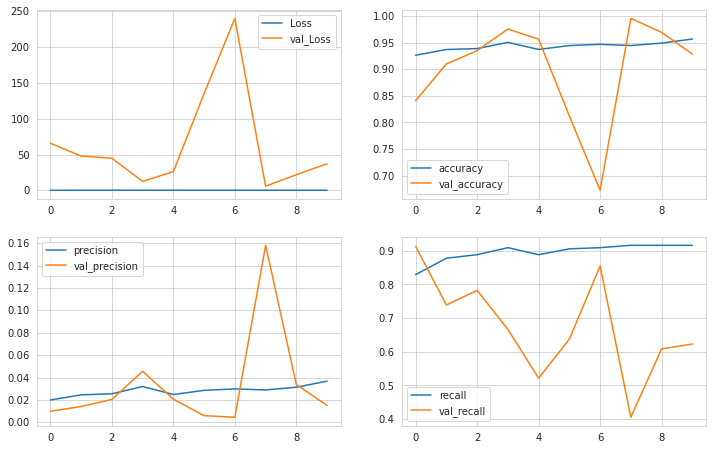

In [41]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.legend()

In [42]:
y_train_pred = model.predict(X_train_d)
y_test_pred = model.predict(X_test_d)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'CNNs_1': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 92.87%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.02      0.93       0.51          1.00
recall         0.93   0.77      0.93       0.85          0.93
f1-score       0.96   0.04      0.93       0.50          0.96
support   159204.00 287.00      0.93  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[147902  11302]
 [    65    222]]

Test Result:
Accuracy Score: 92.87%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.01      0.93       0.51          1.00
recall        0.93   0.66      0.93       0.80          0.93
f1-score      0.96   0.03      0.93       0.50          0.96
support   85307.00 136.00      0.93   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

NameError: name 'f1_score' is not defined

In [43]:
# Implementing XGBoost 


from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
    }

Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.98      1.00       0.99          1.00
recall         1.00   0.84      1.00       0.92          1.00
f1-score       1.00   0.91      1.00       0.95          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159200      4]
 [    46    241]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

NameError: name 'f1_score' is not defined

In [46]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, class_weight=weights, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
    }

KeyboardInterrupt: 